### Data Exploration


In [152]:
%pip install pandas
%pip install numpy

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [10]:
dataset = pd.read_csv('../problem/churn_data.csv')

**Question:** What does my data look like?

**Conclusion:** An ID column, product in question, churn label, tenure (?), and average play in total, followed by series and film, both for 120 and 90 days. I would assume that `AVG_PLAY_120` is inclusive of data from `AVG_PLAY_90`. I am considering having one of these two features removed for all occurrences (total average, series, and film).

In [12]:
dataset.tail()

,ID,PRODUCT,CHURN_FLAG,TENURE,AVG_PLAY_120,AVG_PLAY_90,SERIES_AVG_PLAY_LAST_120,SERIES_AVG_PLAY_LAST_90,FILM_AVG_PLAY_LAST_120,FILM_AVG_PLAY_LAST_90
39116,9222230517094271402,0,1,153,291.235,NaN,217.6552,238.4907,73.5800,NaN
39117,9222242980715296713,2,1,1692,158.131,216.231,56.6317,73.7410,101.4995,142.4905
39118,9222390979765727046,2,1,1405,362.334,408.783,299.6293,346.0778,62.7047,62.7047
39119,9222610542868281486,2,1,1462,148.266,135.464,97.5352,90.7156,50.7306,44.7488
39120,9222923707970402478,2,1,304,93.131,110.009,65.5378,77.3671,27.5931,32.6415


**Question:** Which of my features are categorical? binary? numeric? what are their data types?

**Conclusion:** I have five main products, a churn label `CHURN_FLAG`, and a large number of unique `TENURE` data points. I emailed Josef to ask about that particular feature. Categorical columns have integers, while the remianing numerical ones are floats. 

In [13]:
dataset.nunique()

ID                          39089
PRODUCT                         5
CHURN_FLAG                      2
TENURE                       1734
AVG_PLAY_120                36619
AVG_PLAY_90                 33791
SERIES_AVG_PLAY_LAST_120    38689
SERIES_AVG_PLAY_LAST_90     37225
FILM_AVG_PLAY_LAST_120      38468
FILM_AVG_PLAY_LAST_90       36223
dtype: int64

In [44]:
dataset.dtypes

ID                            int64
PRODUCT                       int64
CHURN_FLAG                    int64
TENURE                        int64
AVG_PLAY_120                float64
AVG_PLAY_90                 float64
SERIES_AVG_PLAY_LAST_120    float64
SERIES_AVG_PLAY_LAST_90     float64
FILM_AVG_PLAY_LAST_120      float64
FILM_AVG_PLAY_LAST_90       float64
dtype: object

**Question:** Do I have any missing values in any of my features?

**Conclusion:** Yes, every `*_90` column has some values missing. More reason to drop these altogether, although it would be possible to substitute these values with the mean or median of the entire column. 

In [14]:
dataset.isnull().sum()

ID                             0
PRODUCT                        0
CHURN_FLAG                     0
TENURE                         0
AVG_PLAY_120                   0
AVG_PLAY_90                 3403
SERIES_AVG_PLAY_LAST_120       0
SERIES_AVG_PLAY_LAST_90     1504
FILM_AVG_PLAY_LAST_120         0
FILM_AVG_PLAY_LAST_90       2333
dtype: int64

**Question:** What do my mean and median for each feature look like?

**Conclusion:** 
- Mean and median values seem consistent. The data therefore symmetrical and has very little skewness.
- We can see a consistent trend between average play time in the last 90 and 120 days for all products, highest among `PRODUCT` of label `2`.
- We observe very similar trends in average play in the last 90 to 120 whether or not the users churn. 


Text(0.5, 1.0, 'Mean and median for average play in the last 90 and 120 days, by total, series, and film')

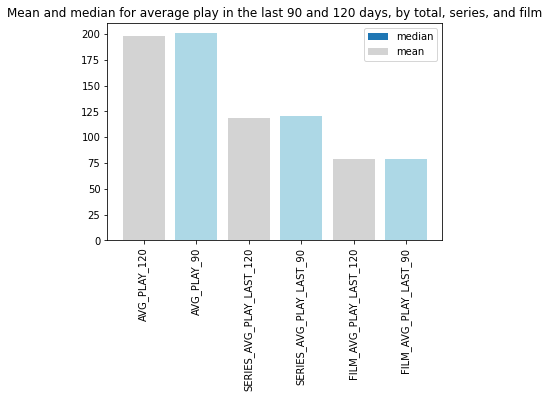

In [217]:
plt.bar(dataset.iloc[:, 4:].columns.tolist(), dataset.iloc[:, 4:].median(), label='median')
plt.bar(dataset.iloc[:, 4:].columns.tolist(), dataset.iloc[:, 4:].mean(), color=['lightgray', 'lightblue'], label='mean')
plt.xticks(rotation=90);
plt.legend()
plt.title('Mean and median for average play in the last 90 and 120 days, by total, series, and film')

In [234]:
# subcategorybar function source: https://stackoverflow.com/a/48158449/14123992

def subcategorybar(X, vals, legend, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=legend[i])   
    plt.xticks(_X, X)

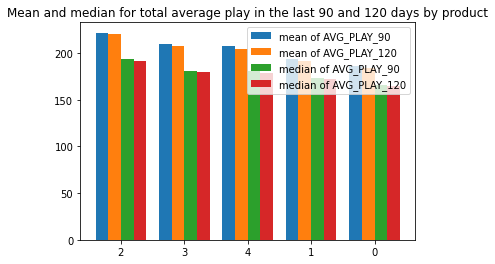

In [235]:
means = dataset.iloc[:, 4:6].groupby(dataset['PRODUCT']).mean()
medians = dataset.iloc[:, 4:6].groupby(dataset['PRODUCT']).median()
products = dataset['PRODUCT'].unique().tolist()
legend = ['mean of AVG_PLAY_90', 'mean of AVG_PLAY_120', 'median of AVG_PLAY_90', 'median of AVG_PLAY_120']

subcategorybar(products, [means.AVG_PLAY_90.tolist(),means.AVG_PLAY_120.tolist(),medians.AVG_PLAY_90.tolist(), medians.AVG_PLAY_120.tolist()], legend)

plt.title('Mean and median for total average play in the last 90 and 120 days by product')
plt.legend()
plt.show()




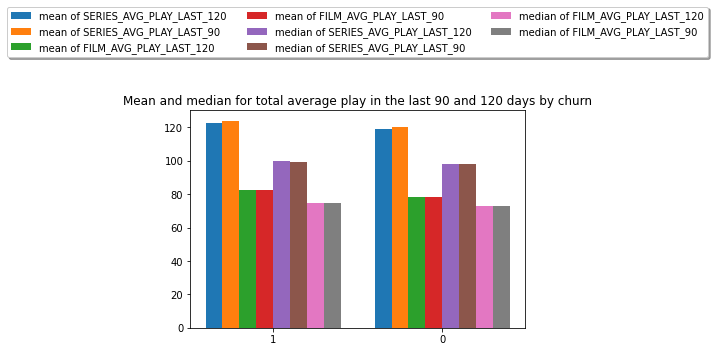

In [237]:
means = dataset.iloc[:, 6:].groupby(dataset['CHURN_FLAG']).mean()
medians = dataset.iloc[:, 6:].groupby(dataset['CHURN_FLAG']).median()
churn = dataset['CHURN_FLAG'].unique().tolist()
legend = ['mean of SERIES_AVG_PLAY_LAST_120', 'mean of SERIES_AVG_PLAY_LAST_90', 'mean of FILM_AVG_PLAY_LAST_120', 'mean of FILM_AVG_PLAY_LAST_90', 
            'median of SERIES_AVG_PLAY_LAST_120', 'median of SERIES_AVG_PLAY_LAST_90', 'median of FILM_AVG_PLAY_LAST_120', 'median of FILM_AVG_PLAY_LAST_90']


subcategorybar(churn, [means.SERIES_AVG_PLAY_LAST_120.tolist(),
                        means.SERIES_AVG_PLAY_LAST_90.tolist(),
                        means.FILM_AVG_PLAY_LAST_120.tolist(),
                        means.FILM_AVG_PLAY_LAST_90.tolist(),
                        medians.SERIES_AVG_PLAY_LAST_120.tolist(),
                        medians.SERIES_AVG_PLAY_LAST_90.tolist(),
                        medians.FILM_AVG_PLAY_LAST_120.tolist(),
                        medians.FILM_AVG_PLAY_LAST_90.tolist()
], legend)

plt.title('Mean and median for total average play in the last 90 and 120 days by churn')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

**Question:** Is the data imbalanced?

**Conclusion:** More users tend to churn. As mentioned by this article on [Churn Reduction](https://churnkey.co/blog/stop-predicting-churn-start-maximizing-profits), a high churn rate is bound to occur when businesses grow bigger: 

> the more your business grows, the more customers you'll have cancelling every month

In [125]:
dataset['CHURN_FLAG'].groupby(dataset['CHURN_FLAG']).count()

CHURN_FLAG
0     4552
1    34569
Name: CHURN_FLAG, dtype: int64